In [1]:
import numpy as np
from send_help import *
from Functions import *
import pickle
from sklearn.neighbors import NearestNeighbors
import math
import os
import matplotlib.pyplot as plt

with open('./Decomp_Hists_31bin_07_04_Dict_7.5A.pickle', 'rb') as handle:
    N5 = pickle.load(handle)

def Generate_List():
    from pathlib import Path
    path = Path('../../get_folds/depth_db')
    i=0
    List = []
    Name = []
    for entry in path.iterdir():
        if entry.name.endswith('-residue_depth.pdb'):
            temp = []
            p = str(path) +"/"+ entry.name
            name = entry.name.split("-")[0]
            temp = read_pdb_files(p)
            Dict = gen_res_dict(temp)  #Switch to Single/Multi Chain Prediction Only
            data = get_data(Dict)
            data = np.array(data)
            Name.append(name)
            List.append(data[:,1:])
    return List,Name

List , Name = Generate_List()

#*2 floor and total /2
def get_score(d):
    d = float(d)
    s = int(math.floor(d*2))
    return s

def R_N(inherit):
    indices = neighbors(inherit,7.5)
    newstars = yeet(indices)
    data = add_depth(inherit,newstars)
    return data

def count_zeroes(arr):
    zero_count = 0
    for i in arr:
        if float(i) == 0.0:
            zero_count += 1
    return zero_count

# Create a dictionary to keep track of element counts
counts = {}

# Iterate over the list and update the dictionary
for i, element in enumerate(Name):
    if element not in counts:
        # First occurrence of element
        counts[element] = 1
    else:
        # Increment count and update element string
        counts[element] += 1
        Name[i] = f'{element}{counts[element]-1}'

Cumulative_score_real_fold=[]
Cumulative_score_bestpred_fold=[]
Avg_Error_per_res=[]
All_family_folds=[]

In [84]:
f = 'VSEIKTLVTFFGGTGDLAKRKLYPSVFNLYKKGYLQKHFAIVGTARQALNDDEFKQLVRDCIKDFTDDQAQAEAFIEHFSYRAHDVTDAASYAVLKEAIEEAADKFDIDGNRIFYMSVAPRFFGTIAKYLKSEGLLADTGYNRLMIEKPFGTSYDTAAELQNDLENAFDDNQLFRIDHYLGKEMVQNIAALRFGNPIFDAAWNKDYIKNVQVTLSEVLGVEERAGYYDTAGALLDMIQNHTMQIVGWLAMEKPESFTDKDIRAAKNAAFNALKIYDEAEVNKYFVRAQYGAGDSADFKPYLEELDVPADSKNNTFIAGELQFDLPRWEGVPFYVRSGKRLAAKQTRVDIVFKAGTFNFGSEQEAQEAVLSIIIDPKGAIELKLNAKSVEDAFNTRTIDLGWTVSDEDKKNTPEPYERMIHDTMNGDGSNFADWNGVSIAWKFVDAISAVYTADKAPLETYKSGSMGPEASDKLLAANGDAWVFKG'
# kn=f[181:486]
print(len(f))
omit=[413,414,415,416,417,418,419,420,421,422,423,424,425,426]


f = list(f)

# Remove the elements at the specified indices using a list comprehension
f = [f[i] for i in range(len(f)) if i not in omit]

# Convert the list back to a string
f = ''.join(f)

print(len(f))

print((f[181:486]))
seq = Fasta_to_AA(f) 

Fold_Family='G6PD_C'
All_family_folds.append(Fold_Family)

485
471
KEMVQNIAALRFGNPIFDAAWNKDYIKNVQVTLSEVLGVEERAGYYDTAGALLDMIQNHTMQIVGWLAMEKPESFTDKDIRAAKNAAFNALKIYDEAEVNKYFVRAQYGAGDSADFKPYLEELDVPADSKNNTFIAGELQFDLPRWEGVPFYVRSGKRLAAKQTRVDIVFKAGTFNFGSEQEAQEAVLSIIIDPKGAIELKLNAKSVEDAFNTRTIDLGWTVSDEDKKNTPESNFADWNGVSIAWKFVDAISAVYTADKAPLETYKSGSMGPEASDKLLAANGDAWVFKG


In [2]:
f = 'MRGMLPLFEPKGRVLLVDGHHLAYRTFHALKGLTTSRGEPVQAVYGFAKSLLKALKEDGDAVIVVFDAKAPSFRHEAYGGYKAGRAPTPEDFPRQLALIKELVDLLGLARLEVPGYEADDVLASLAKKAEKEGYEVRILTADKDLYQLLSDRIHVLHPEGYLITPAWLWEKYGLRPDQWADYRALTGDESDNLPGVKGIGEKTARKLLEEWGSLEALLKNLDRLKPAIREKILAHMDDLKLSWDLAKVRTDLPLEVDFAKRREPDRERLRAFLERLEFGSLLHEF'
print(len(f))
seq = Fasta_to_AA(f) 

Fold_Family='5_3_exonuclease'
All_family_folds.append(Fold_Family)

index_ori=Name.index(Fold_Family)
Original_fold=List[index_ori]
print(len(Original_fold))
print(Name[index_ori])

285
285
5_3_exonuclease


295
295
These are the no. of folds inherited:  295


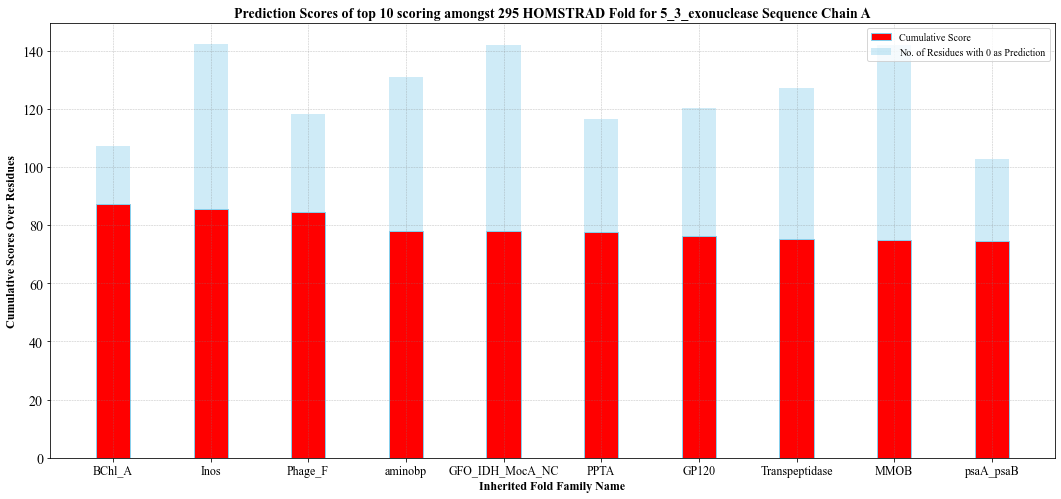

285
295
295
These are the no. of folds inherited:  295


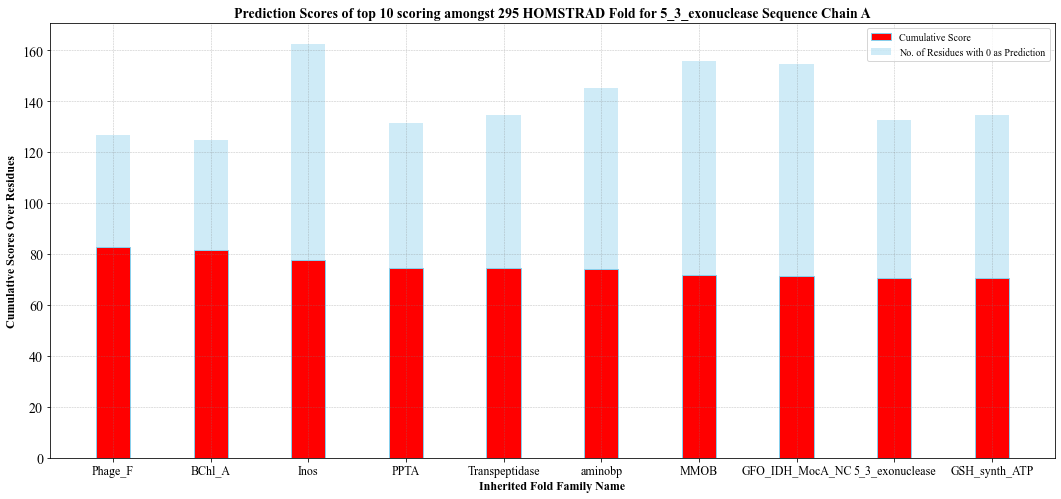

285
295
295
These are the no. of folds inherited:  295


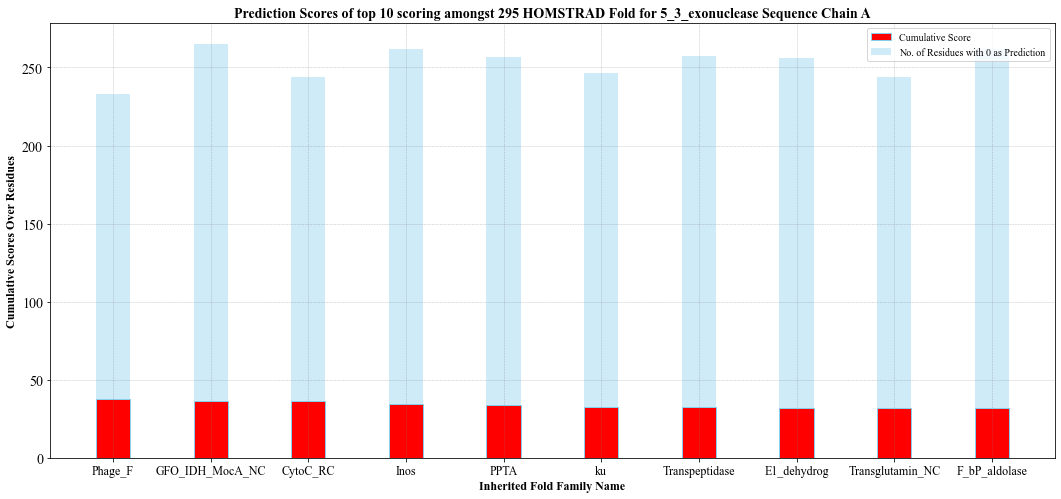

285
295
295
These are the no. of folds inherited:  295


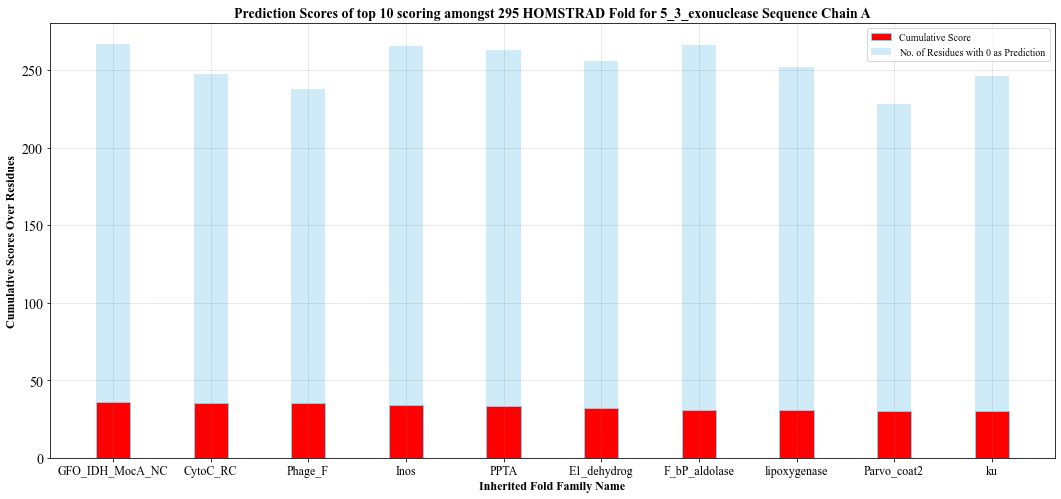

285
295
295
These are the no. of folds inherited:  295


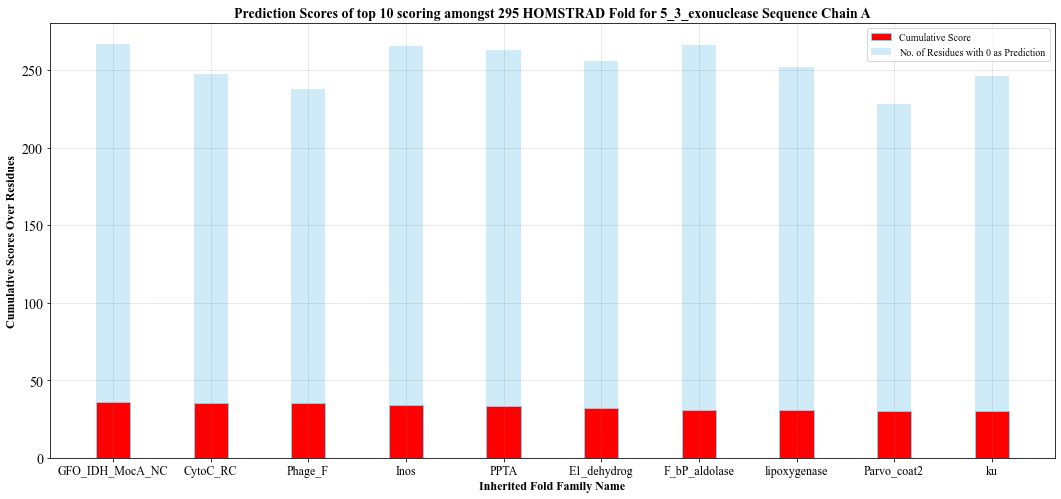

285


In [3]:
for k in range(2,7):
    dk= k+1
    def R_score(ndata):
        score = []
        for i in ndata:
            N = i[:-1]
            if float(i[-1].strip()) >=16:
                score.append(0)
            else:
                if len(N)<=k: #Some neighbourhoods by default are less than 3 nbrs
                    if tuple(N) in N5:
                            try:
                                s = (N5[tuple(N)])[get_score(float(i[-1].strip()))]
                                score.append(s)
                            except:
                                score.append(0)
                    else:
                        score.append(0)
                            # if s == 0:
                                # print(N5[tuple(N)])
                                # print("Score is zero here! ",str(N),"for bin: ",get_score(float(i[-1].strip())), "But the actual Depth given to nbr was: ",i[-1])
                else:
                    while len(N)>k: #But if they are not then check if their scores and if not exist then decompose and again check.
                        if tuple(N) in N5:
                            try:
                                s = (N5[tuple(N)])[get_score(float(i[-1].strip()))]
                                score.append(s)
                            except:
                                score.append(0)
                            # if s == 0:
                                # print(N5[tuple(N)])
                                # print("Score is zero here! ",str(N),"for bin: ",get_score(float(i[-1].strip())), "But the actual score given to nbr was: ",i[-1])
                            break
                        elif len(N) == (k+1): #i.e. accepting scores until atleast 2 nbrs still exist (decompose until 2 nbrs)
                            if tuple(N) in N5:
                                s = (N5[tuple(N)])[get_score(float(i[-1].strip()))]
                                # print(i[-1])
                                score.append(s)
                                break
                            else:
                                score.append(0)
                                # print(N)
                                break
                        else:
                            N = N[:-1]
        return (score)

    #Part to Automate for all Folds must be inherited, starting with No Shift
    Scored_Inherited_folds={}
    Check_zeroes={}
    i=0
    j=0
    while i in range(0,len(List)):
        try:
            a = Inherit(seq,List[i],0)
            a = np.array(a)
            # print(len(a))
            N = R_N(a)
            s = R_score(N)
            # print(sum(s))
            Scored_Inherited_folds[str(Name[i])]=sum(s)
            # print(Name[i])
            Check_zeroes[str(Name[i])]=count_zeroes(s)
            j+=1
        except Exception as e:
            _=0
        i+=1
    print(len(Check_zeroes))
    print(len(Scored_Inherited_folds))
    sorted_keys = sorted(Scored_Inherited_folds, key=Scored_Inherited_folds.get, reverse=True)

    sorted_dict = {}
    for key in sorted_keys:
        sorted_dict[key] = Scored_Inherited_folds[key]

    folds_inherited=len(sorted_dict)
    print("These are the no. of folds inherited: ",folds_inherited)




    plt.rcParams['font.family'] = 'Times New Roman'
    current_dir = os.getcwd()

    fig, ax = plt.subplots(figsize=(18, 8))

    labels = list(sorted_dict.keys())[:10]
    values1 = [sorted_dict.get(k, 0) for k in labels]
    values2 = [Check_zeroes.get(k, 0) for k in labels]

    x = labels
    ax.grid(True, linestyle='--', linewidth=0.5, color='gray', alpha=0.5, zorder=0)
    ax.bar(x, values1, width=0.35, label='Cumulative Score', color='r',edgecolor='skyblue')
    ax.bar(x, values2, bottom=values1, width=0.35, label='No. of Residues with 0 as Prediction', color='skyblue',alpha=0.4)

    ax.set_xticks([i for i in x])
    ax.set_xticklabels(labels, fontsize=12)
    ax.tick_params(axis='y', labelsize=14)

    ax.set_xlabel('Inherited Fold Family Name', fontsize=12,fontweight="bold")
    ax.set_ylabel('Cumulative Scores Over Residues', fontsize=12,fontweight="bold") # Set y-axis label with font size

    ax.set_title('Prediction Scores of top 10 scoring amongst '+str(folds_inherited)+' HOMSTRAD Fold for '+Fold_Family+ ' Sequence Chain A', fontsize=14,fontweight="bold")
    # ax.legend()
    ax.legend(loc='upper right')

    plt.savefig('./plot_'+str(Fold_Family)+'_7.5_'+str(dk)+'.png',dpi=400, bbox_inches='tight')
    plt.show()



    index_ori=Name.index(Fold_Family)
    Original_fold=List[index_ori]

    v = Inherit(seq,Original_fold,0)
    v = np.array(v)
    print(len(v))
    N = R_N(v)
    m = R_score(N)
    with open('./'+str(Fold_Family)+'_var_decomp.txt','a+') as f:
        f.writelines("This is the minimum neighbourhood to which Decomp occured: "+str(dk)+'\n')
        f.writelines('These are the no. of scores assigned given the 285 residues in the seq: '+str(len(m))+'\n')
        f.writelines('This is the no. of residues with 0 score: '+str(count_zeroes(m))+'\n')
        f.writelines('This is cumulative score: '+str(sum(m))+'\n')
        # f.writelines('This is cumulative score: '+str(len(m))+'\n')
        i=0
        for key, value in sorted_dict.items():
            
            if key== Fold_Family:
                f.writelines('This is the rank of the correct Fold: '+str(i))
                break
            else:
                i+=1
        f.writelines(' '+'\n')


In [146]:
Cumulative_score_real_fold=[]
Cumulative_score_bestpred_fold=[]
Avg_Error_per_res=[]
All_family_folds=[]
Actual_error_per_residue=[]

In [170]:
f = 'MRGMLPLFEPKGRVLLVDGHHLAYRTFHALKGLTTSRGEPVQAVYGFAKSLLKALKEDGDAVIVVFDAKAPSFRHEAYGGYKAGRAPTPEDFPRQLALIKELVDLLGLARLEVPGYEADDVLASLAKKAEKEGYEVRILTADKDLYQLLSDRIHVLHPEGYLITPAWLWEKYGLRPDQWADYRALTGDESDNLPGVKGIGEKTARKLLEEWGSLEALLKNLDRLKPAIREKILAHMDDLKLSWDLAKVRTDLPLEVDFAKRREPDRERLRAFLERLEFGSLLHEF'
print(len(f))
seq = Fasta_to_AA(f) 

Fold_Family='5_3_exonuclease'
All_family_folds.append(Fold_Family)
print(All_family_folds)

130
['5_3_exonuclease', '7kD_DNA_binding', '6PF2K', 'G6PD_C', 'aakinase', '6PGD', 'cytprime', 'ferritin', 'FTR', 'A2M_A']


In [171]:
def R_score(ndata):
    score = []
    for i in ndata:
        N = i[:-1]
        if float(i[-1].strip()) >=16:
            score.append(0)
        else:
            if len(N)<=3: #Some neighbourhoods by default are less than 3 nbrs
                if tuple(N) in N5:
                        try:
                            s = (N5[tuple(N)])[get_score(float(i[-1].strip()))]
                            score.append(s)
                        except:
                            score.append(0)
                else:
                    score.append(0)
                        # if s == 0:
                            # print(N5[tuple(N)])
                            # print("Score is zero here! ",str(N),"for bin: ",get_score(float(i[-1].strip())), "But the actual Depth given to nbr was: ",i[-1])
            else:
                while len(N)>3: #But if they are not then check if their scores and if not exist then decompose and again check.
                    if tuple(N) in N5:
                        try:
                            s = (N5[tuple(N)])[get_score(float(i[-1].strip()))]
                            score.append(s)
                        except:
                            score.append(0)
                        # if s == 0:
                            # print(N5[tuple(N)])
                            # print("Score is zero here! ",str(N),"for bin: ",get_score(float(i[-1].strip())), "But the actual score given to nbr was: ",i[-1])
                        break
                    elif len(N) == 4: #i.e. accepting scores until atleast 2 nbrs still exist (decompose until 2 nbrs)
                        if tuple(N) in N5:
                            s = (N5[tuple(N)])[get_score(float(i[-1].strip()))]
                            # print(i[-1])
                            score.append(s)
                            break
                        else:
                            score.append(0)
                            # print(N)
                            break
                    else:
                        N = N[:-1]
    return (score)

Scored_Inherited_folds={}
Check_zeroes={}
i=0
j=0
while i in range(0,len(List)):
    try:
        a = Inherit(seq,List[i],0)
        a = np.array(a)
        # print(len(a))
        N = R_N(a)
        s = R_score(N)
        # print(sum(s))
        Scored_Inherited_folds[str(Name[i])]=sum(s)
        # print(Name[i])
        Check_zeroes[str(Name[i])]=count_zeroes(s)
        j+=1
    except Exception as e:
        _=0
    i+=1
sorted_keys = sorted(Scored_Inherited_folds, key=Scored_Inherited_folds.get, reverse=True)

sorted_dict = {}
for key in sorted_keys:
    sorted_dict[key] = Scored_Inherited_folds[key]

folds_inherited=len(sorted_dict)
print("These are the no. of folds inherited: ",folds_inherited)

for key, value in sorted_dict.items():
        if key== Fold_Family:
            Cumulative_real=value
            print(key,value)

for key, value in sorted_dict.items():
    a= str(key)
    print(a)
    # Cumulative_score_bestpred_fold.append(value)
    break
index = Name.index(a)
cum_score_bestpred=sorted_dict[a]
scored=List[index]


index_ori=Name.index(Fold_Family)
Original_fold=List[index_ori]
norm_real=Cumulative_real/len(Original_fold)

norm_bestpred_score=cum_score_bestpred/len(Original_fold)
print(norm_bestpred_score)

Cumulative_score_bestpred_fold.append(norm_bestpred_score)
# print(cum_core_bestpred,len(scored))

# print(Cumulative_real,len(Original_fold))
print(norm_real)
Cumulative_score_real_fold.append(norm_real)

#Get the Scores alloted to each Residue Depth upon Inheritance of spatial Rnbrs in Taken Sequence
v = Inherit(seq,scored,0) #Seq inherits C-beta Coordinates(and Depths)
v = np.array(v)

N = R_N(v) #Based on Inherited Coordinates(and Depths), Rnbrs of residues of Seq are calculated

m = R_score(N) #Score the specific Depths based on Rnbrs Realized for each residue by virtue of it's inheritance
print(len(m))
Error=[]
gen_err=[]
shift=0
i=0+shift
original_depths=[]
best_scord_depths=[]
while i <= (len(Original_fold)-1):
    ori_Depth= float((Original_fold)[i][-1].strip())
    original_depths.append(ori_Depth)
    # print("Oris: ", type(ori_Depth),ori_Depth)
    Scor_Dpt=float((scored[i][-1]).strip())
    best_scord_depths.append(Scor_Dpt)
    # print("Scored Depths: ",float((scored[i][-1]).strip()))
    diff= abs(Scor_Dpt-ori_Depth)
    gen_err.append(diff)
    Error.append(diff*m[i])
    i+=1

avg_err=np.average(Error)
Avg_Error_per_res.append(avg_err)
avg_diff=np.average(gen_err)
Actual_error_per_residue.append(avg_diff)
print(i)
print("This is the average error of Residue Depths differences: ",np.average(gen_err))
print("Average Error Weighted by Score Provided: ", avg_err)
print(Avg_Error_per_res, Actual_error_per_residue)

These are the no. of folds inherited:  671
A2M_A 32.27755576729229
L15
0.3638278734810321
0.248288890517633
130
130
This is the average error of Residue Depths differences:  2.155923076923077
Average Error Weighted by Score Provided:  0.738965248505549
[0.5927832711982184, 0.4534506012537184, 0.0, 0.5387095337036746, 0.636882470062366, 0.0, 0.7375564395191854, 0.4850627218961519, 0.6792453700867315, 0.738965248505549] [2.2995789473684214, 1.07234375, 0.0, 2.6532068965517244, 1.9740390879478826, 0.0, 1.8726771653543304, 1.3794152046783625, 2.1925874125874127, 2.155923076923077]


In [165]:
print(Cumulative_score_bestpred_fold)
print(Cumulative_score_real_fold)

[0.29065094956325943, 0.5509883571442047, 0.2980149461344741, 0.27511773024122926, 0.27801524571438097, 0.24612942877232827, 0.41491666507715436, 0.3315381765419995]
[0.2473406363216321, 0.41123939136130105, 0.2980149461344741, 0.2342131197712665, 0.24172721163612834, 0.24612942877232827, 0.2293635728368455, 0.22348738521723904]


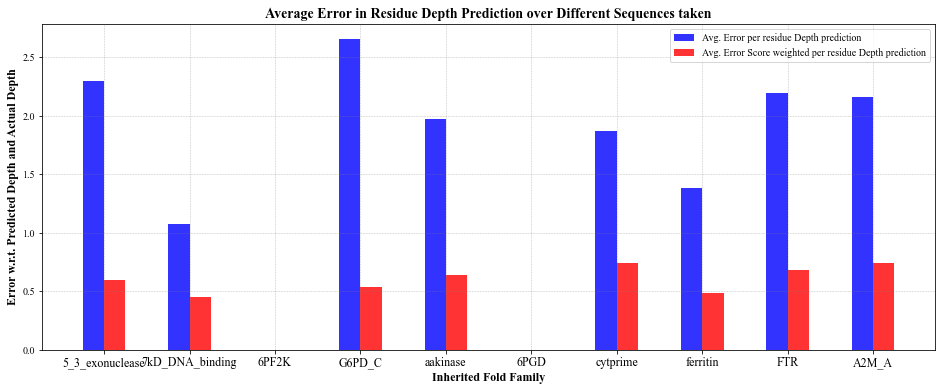

In [214]:
plt.rcParams['font.family'] = 'Times New Roman'
current_dir = os.getcwd()

fig, ax = plt.subplots(figsize=(16, 6))

n=10
r = np.arange(n)
width = 0.25
  
ax.grid(True, linestyle='--', linewidth=0.5, color='gray', alpha=0.5, zorder=0) 
ax.bar(r, Actual_error_per_residue, color = 'b',alpha=0.8,
        width = width,
        label='Avg. Error per residue Depth prediction')
ax.bar(r + width, Avg_Error_per_res, color = 'r',alpha=0.8,
        width = width,
        label='Avg. Error Score weighted per residue Depth prediction')

ax.set_xlabel("Inherited Fold Family", fontsize=12,fontweight="bold")
ax.set_ylabel("Error w.r.t. Predicted Depth and Actual Depth", fontsize=12,fontweight="bold")
ax.set_title("Average Error in Residue Depth Prediction over Different Sequences taken", fontsize=14,fontweight="bold")
  
# ax.set_xticks(r + width/2,All_family_folds)

ax.set_xticks(r + width/2)
ax.set_xticklabels(All_family_folds, fontsize=12)

ax.legend(loc='upper right')

plt.savefig('./Prediction_error.png',dpi=400, bbox_inches='tight')
plt.show()


In [4]:
Cumulative_score_real_fold=[0.2473406363216321, 0.41123939136130105, 0.2980149461344741, 0.2342131197712665, 0.24172721163612834, 0.24612942877232827, 0.2293635728368455, 0.22348738521723904, 0.23857119204372704, 0.248288890517633]


Cumulative_score_bestpred_fold=[0.29065094956325943, 0.5509883571442047, 0.2980149461344741, 0.27511773024122926, 0.27801524571438097, 0.24612942877232827, 0.41491666507715436, 0.3315381765419995, 0.3383341835155454, 0.3638278734810321]



All_family_folds=['5_3_exonuclease', '7kD_DNA_binding', '6PF2K', 'G6PD_C', 'aakinase', '6PGD', 'cytprime', 'ferritin', 'FTR', 'A2M_A']

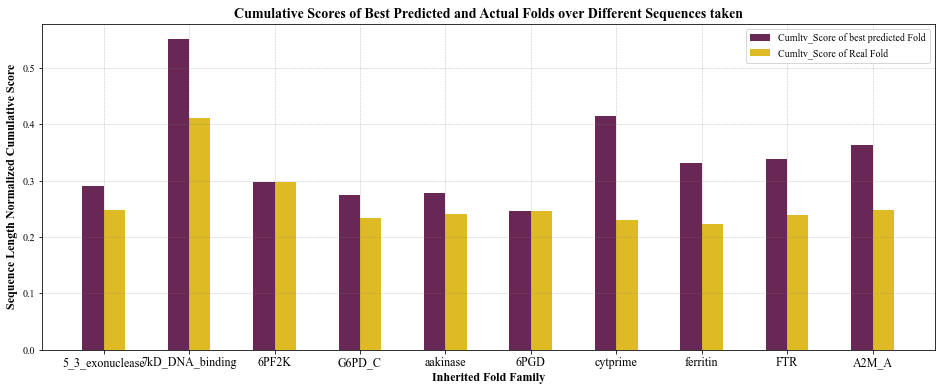

In [5]:
# print(Cumulative_score_bestpred_fold,Cumulative_score_real_fold)

plt.rcParams['font.family'] = 'Times New Roman'
current_dir = os.getcwd()

fig, ax = plt.subplots(figsize=(16, 6))


n=10
r = np.arange(n)
width = 0.25
  
ax.grid(True, linestyle='--', linewidth=0.5, color='gray', alpha=0.5, zorder=0) 
ax.bar(r, Cumulative_score_bestpred_fold, color = '#580F41',alpha=0.9,
        width = width,
        label='Cumltv_Score of best predicted Fold')
ax.bar(r + width, Cumulative_score_real_fold, color = '#DBB40C',alpha=0.9,
        width = width,
        label='Cumltv_Score of Real Fold')

ax.set_xlabel("Inherited Fold Family", fontsize=12,fontweight="bold")
ax.set_ylabel("Sequence Length Normalized Cumulative Score", fontsize=12,fontweight="bold")
ax.set_title("Cumulative Scores of Best Predicted and Actual Folds over Different Sequences taken", fontsize=14,fontweight="bold")
  
# ax.set_xticks(r + width/2,All_family_folds)

ax.set_xticks(r + width/2)
ax.set_xticklabels(All_family_folds, fontsize=12)

ax.legend(loc='upper right')

plt.savefig('./Prediction_cumScores.png',dpi=400, bbox_inches='tight')
plt.show()